In [592]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [593]:
pip install quandl

In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [763]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [764]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [765]:
os.chdir("C:\\Users\\sthan\\OneDrive\\Desktop\\AECO Final Exam preparation\\")
df = pd.read_csv('WCOILWTICO.csv')
df.head()

,DATE,WCOILWTICO
0,2002-02-01,19.71
1,2002-02-08,19.97
2,2002-02-15,21.18
3,2002-02-22,20.70
4,2002-03-01,21.43


In [766]:
df.head()

,DATE,WCOILWTICO
0,2002-02-01,19.71
1,2002-02-08,19.97
2,2002-02-15,21.18
3,2002-02-22,20.70
4,2002-03-01,21.43


In [767]:
df.tail()

,DATE,WCOILWTICO
1151,2024-02-23,78.71
1152,2024-03-01,79.58
1153,2024-03-08,79.53
1154,2024-03-15,80.43
1155,2024-03-22,82.79


In [769]:
df = pd.DataFrame(df)

In [771]:
df

,DATE,WCOILWTICO
0,2002-02-01,19.71
1,2002-02-08,19.97
2,2002-02-15,21.18
3,2002-02-22,20.70
4,2002-03-01,21.43
...,...,...
1151,2024-02-23,78.71
1152,2024-03-01,79.58
1153,2024-03-08,79.53
1154,2024-03-15,80.43


In [772]:
df['WCOILWTICO'] = pd.to_numeric(df['WCOILWTICO'], errors='coerce')

In [773]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [774]:
na_rows = df[df['WCOILWTICO'].isna()]

dot_rows = df[df['WCOILWTICO'] == "."]


print("Rows with NA values:")
print(na_rows)


print("\nRows with '.' in DEXSZUS column:")
print(dot_rows)

Rows with NA values:
Empty DataFrame
Columns: [DATE, WCOILWTICO]
Index: []

Rows with '.' in DEXSZUS column:
Empty DataFrame
Columns: [DATE, WCOILWTICO]
Index: []


In [775]:
df.columns

Index(['DATE', 'WCOILWTICO'], dtype='object')

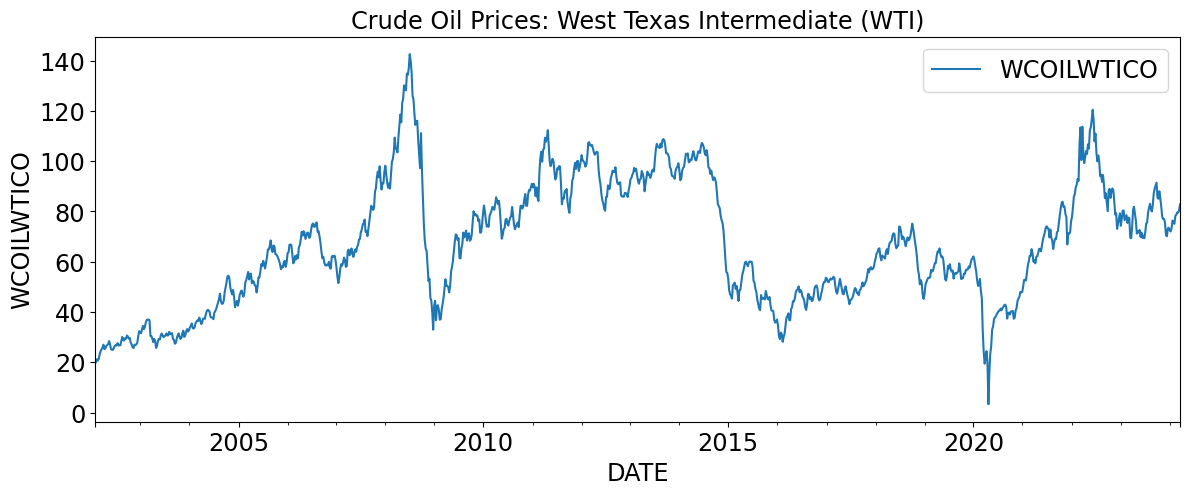

In [776]:
df = pd.DataFrame(df)

df.plot(x='DATE', y='WCOILWTICO', figsize=(14, 5)) 
plt.xlabel('DATE')  
plt.ylabel('WCOILWTICO')  
plt.title('Crude Oil Prices: West Texas Intermediate (WTI)') 
plt.savefig('Crude Oil Prices: West Texas Intermediate (WTI) Till March 22nd 2024 .png')
plt.show()

In [777]:
from datetime import datetime

In [778]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Create 'Julian' column
df['Julian'] = df['DATE'].apply(lambda x: x.to_julian_date())

In [779]:

cutoff_date = datetime(2023, 3, 1)


train_data = df[df['DATE'] <= cutoff_date]
test_data = df[df['DATE'] > cutoff_date]

In [780]:

train_weeks = train_data["Julian"].to_frame()
train_price = train_data["WCOILWTICO"].to_frame()

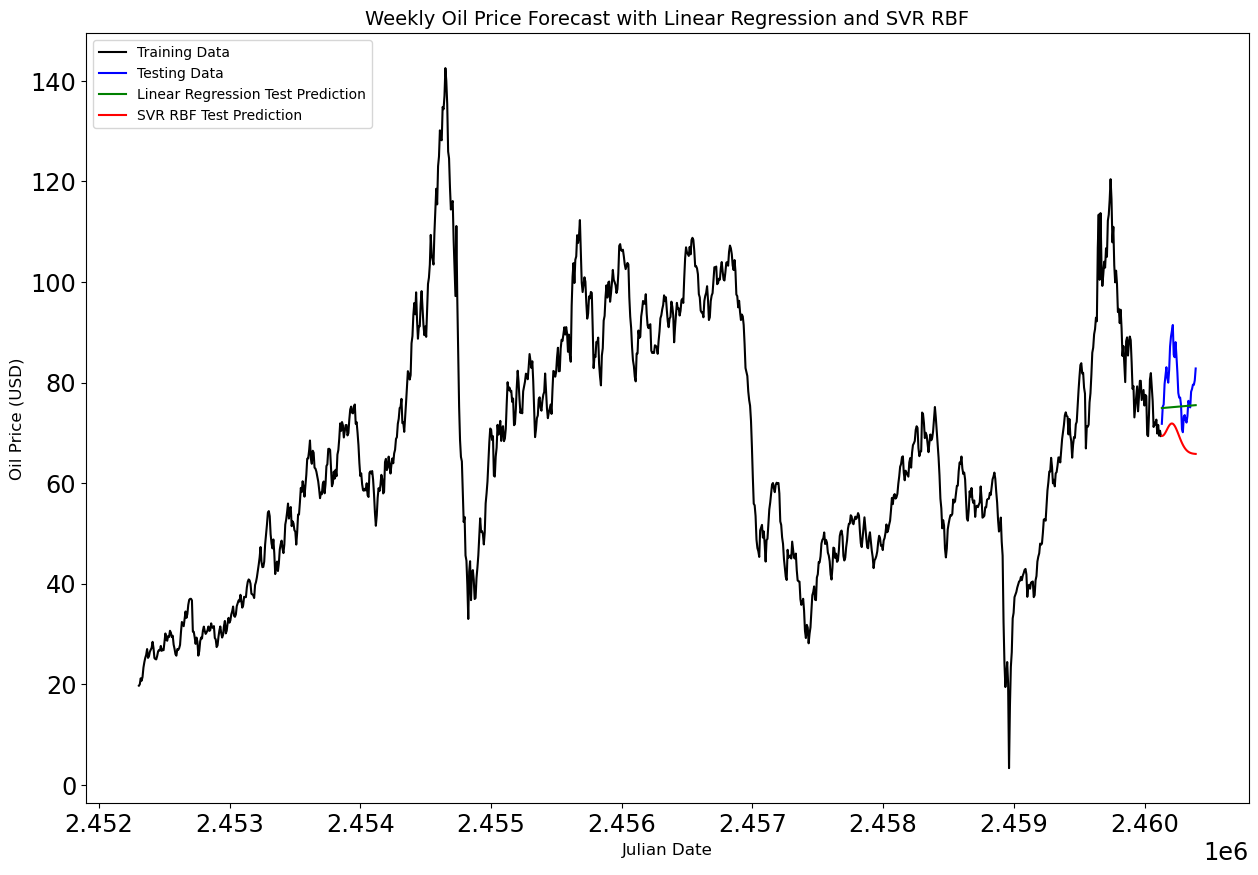

<Figure size 1500x1000 with 0 Axes>

In [781]:
df['DATE'] = pd.to_datetime(df['DATE'])


df['Julian'] = df['DATE'].apply(lambda x: x.to_julian_date())

cutoff_date = datetime(2023, 7, 1)


train_data = df[df['DATE'] <= cutoff_date]
test_data = df[df['DATE'] > cutoff_date]

train_weeks = train_data["Julian"].to_frame()
train_price = train_data["WCOILWTICO"].to_frame()
linear = LinearRegression().fit(train_weeks, train_price)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0001).fit(train_weeks, train_price)


test_weeks = test_data["Julian"].to_frame()
test_price = test_data["WCOILWTICO"].to_frame()

linear_pred_test = linear.predict(test_weeks)
svr_rbf_pred_test = svr_rbf.predict(test_weeks)

plt.plot(train_data['Julian'], train_data['WCOILWTICO'], color='black', label='Training Data')
plt.plot(test_data['Julian'], test_data['WCOILWTICO'], color='blue', label='Testing Data')
plt.plot(test_weeks, linear_pred_test, color='green', label='Linear Regression Test Prediction')
plt.plot(test_weeks, svr_rbf_pred_test, color='red', label='SVR RBF Test Prediction')
plt.xlabel('Julian Date', fontsize=12)  # Adjust font size here
plt.ylabel('Oil Price (USD)', fontsize=12)  # Adjust font size here
plt.legend(loc='upper left', fontsize=10)  # Adjust legend font size here
plt.title('Weekly Oil Price Forecast with Linear Regression and SVR RBF', fontsize=14)  # Adjust title font size here
plt.show()

plt.savefig('Weekly Oil Price Forecast with Linear Regression and SVR RBF.png')


In [782]:

mae = mean_absolute_error(test_price, linear_pred_test)

mse = mean_squared_error(test_price, linear_pred_test)

rmse = np.sqrt(mse)

r_squared = r2_score(test_price, linear_pred_test)

n = len(test_price)
k = 1  
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")


Mean Absolute Error (MAE): 5.413105865119156
Mean Squared Error (MSE): 48.33852939251548
Root Mean Squared Error (RMSE): 6.952591559448569
R-squared (Coefficient of Determination): -0.5576306537162807
Adjusted R-squared: -0.6008981718750663


In [783]:

mae_svr_rbf = mean_absolute_error(test_price, svr_rbf_pred_test)

mse_svr_rbf = mean_squared_error(test_price, svr_rbf_pred_test)


rmse_svr_rbf = np.sqrt(mse)


r_squared_svr_rbf = r2_score(test_price, svr_rbf_pred_test)


n = len(test_price)
k = 1  
adjusted_r_squared_svr_rbf = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")


Mean Absolute Error (MAE): 5.413105865119156
Mean Squared Error (MSE): 48.33852939251548
Root Mean Squared Error (RMSE): 6.952591559448569
R-squared (Coefficient of Determination): -0.5576306537162807
Adjusted R-squared: -0.6008981718750663


In [784]:
import pandas as pd

# Calculate metrics for Linear Regression
linear_metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 
               'Root Mean Squared Error (RMSE)', 'R-squared (Coefficient of Determination)', 
               'Adjusted R-squared'],
    'Linear Regression': [mae, mse, rmse, r_squared, adjusted_r_squared]
}

# Assuming you have metrics for SVR RBF as well
svr_rbf_metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 
               'Root Mean Squared Error (RMSE)', 'R-squared (Coefficient of Determination)', 
               'Adjusted R-squared'],
    'SVR RBF': [mae_svr_rbf, mse_svr_rbf, rmse_svr_rbf, r_squared_svr_rbf, adjusted_r_squared_svr_rbf]
}


df_linear = pd.DataFrame(linear_metrics)
df_svr_rbf = pd.DataFrame(svr_rbf_metrics)

df_combined = df_linear.merge(df_svr_rbf, on='Metric', suffixes=('_Linear', '_SVR_RBF'))
df_combined

,Metric,Linear Regression,SVR RBF
0,Mean Absolute Error (MAE),5.413106,10.520122
1,Mean Squared Error (MSE),48.338529,130.591146
2,Root Mean Squared Error (RMSE),6.952592,6.952592
3,R-squared (Coefficient of Determination),-0.557631,-3.208088
4,Adjusted R-squared,-0.600898,-0.600898


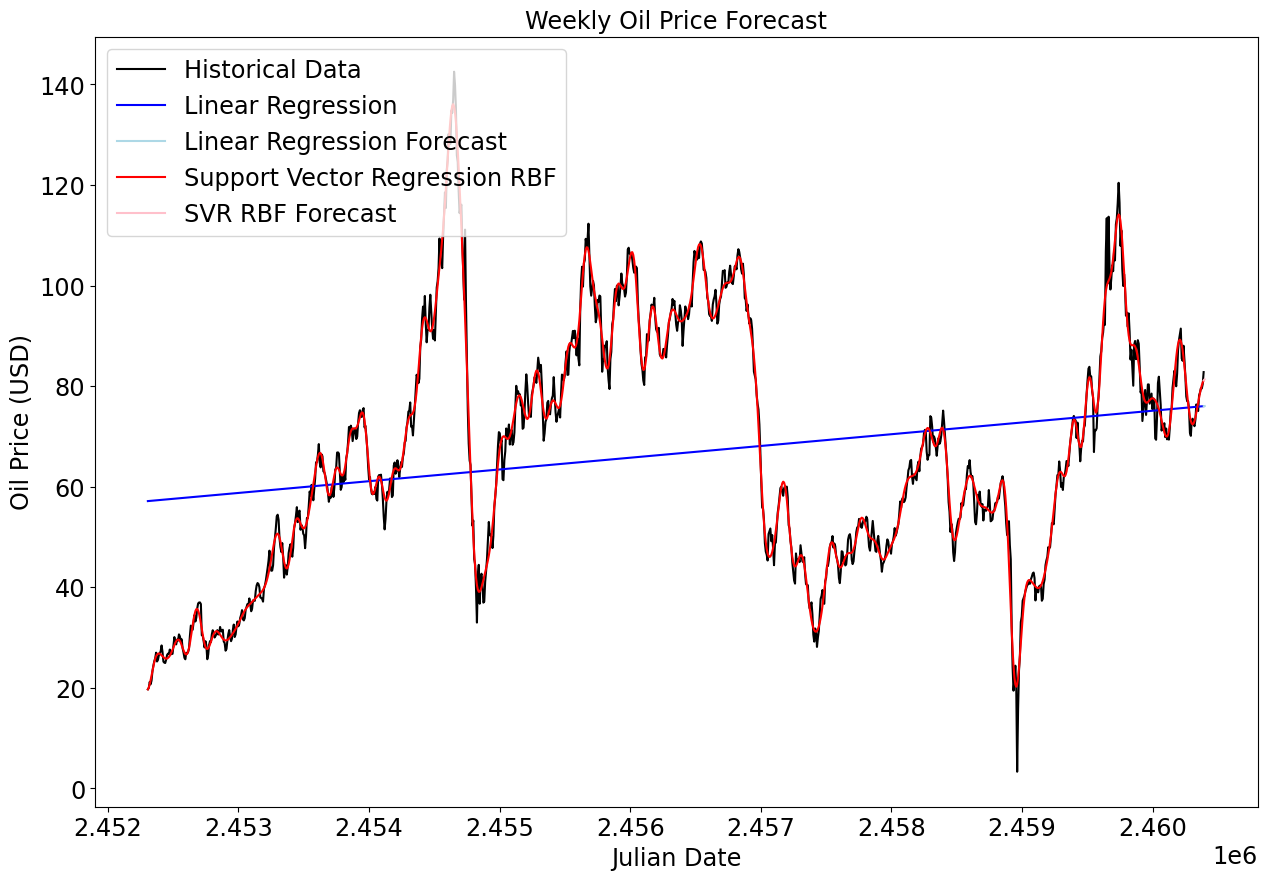

In [785]:

df['DATE'] = pd.to_datetime(df['DATE'])


df['Julian'] = df['DATE'].apply(lambda x: x.to_julian_date())


train_data = df[df['DATE'] <= datetime(2024, 3, 22)]


weeks = train_data["Julian"].to_frame()
price = train_data["WCOILWTICO"].to_frame()

linear = LinearRegression().fit(weeks, price)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0001).fit(weeks, price)


last_week = train_data["Julian"].iloc[-1]
future_weeks = np.arange(last_week + 1, last_week + 9).reshape(-1, 1)  # Forecast 8 weeks ahead
future_price = np.full_like(future_weeks, fill_value=np.nan)


linear_pred = linear.predict(weeks)
linear_pred_future = linear.predict(future_weeks)
svr_rbf_pred = svr_rbf.predict(weeks)
svr_rbf_pred_future = svr_rbf.predict(future_weeks)


plt.plot(train_data['Julian'], train_data['WCOILWTICO'], color='black', label='Historical Data')
plt.plot(weeks, linear_pred, color='blue', label='Linear Regression')
plt.plot(future_weeks, linear_pred_future, color='lightblue', label='Linear Regression Forecast')
plt.plot(weeks, svr_rbf_pred, color='red', label='Support Vector Regression RBF')
plt.plot(future_weeks, svr_rbf_pred_future, color='pink', label='SVR RBF Forecast')
plt.xlabel('Julian Date')
plt.ylabel('Oil Price (USD)')
plt.legend(loc='upper left')
plt.title('Weekly Oil Price Forecast')
plt.show()

In [786]:

exponential_model = sklearn.linear_model.Ridge().fit( 
    X=df[['Julian']], 
    y=np.log(df['WCOILWTICO'])
)

exp_model_df = df
exp_model_df['Exponential_Model'] = np.exp(exponential_model.predict(df[['Julian']]))
exp_model_df['Log_Error_Exponential'] = np.log(df['WCOILWTICO'] / df['Exponential_Model'])

In [787]:
df

,DATE,WCOILWTICO,Julian,Exponential_Model,Log_Error_Exponential
0,2002-02-01,19.71,2452306.5,50.721208,-0.945218
1,2002-02-08,19.97,2452313.5,50.738470,-0.932453
2,2002-02-15,21.18,2452320.5,50.755738,-0.873967
3,2002-02-22,20.70,2452327.5,50.773011,-0.897231
4,2002-03-01,21.43,2452334.5,50.790291,-0.862913
...,...,...,...,...,...
1151,2024-02-23,78.71,2460363.5,75.037894,0.047777
1152,2024-03-01,79.58,2460370.5,75.063432,0.058429
1153,2024-03-08,79.53,2460377.5,75.088978,0.057461
1154,2024-03-15,80.43,2460384.5,75.114533,0.068373


<Axes: >

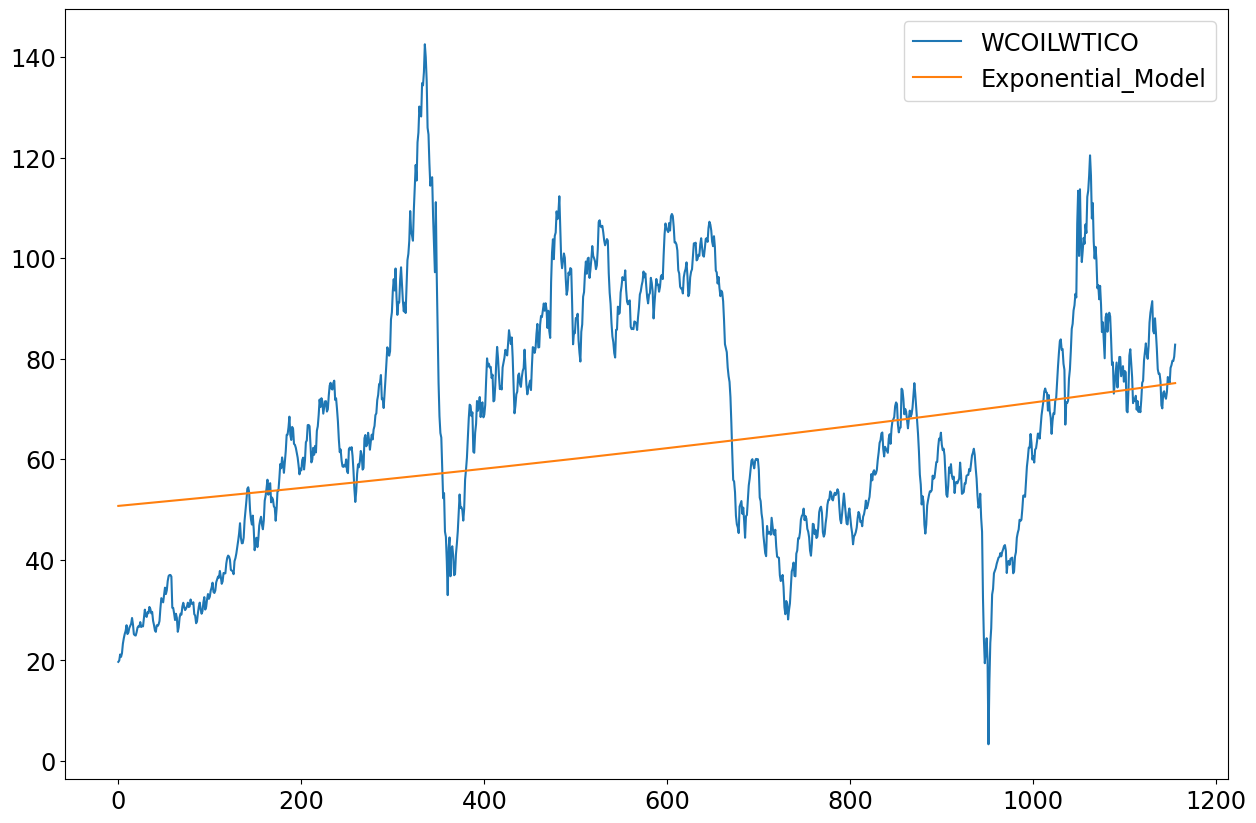

In [788]:
exp_model_df[['WCOILWTICO', 'Exponential_Model']].plot()

In [789]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

def test_stationarity(timeseries):
    
   
    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()

    
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)



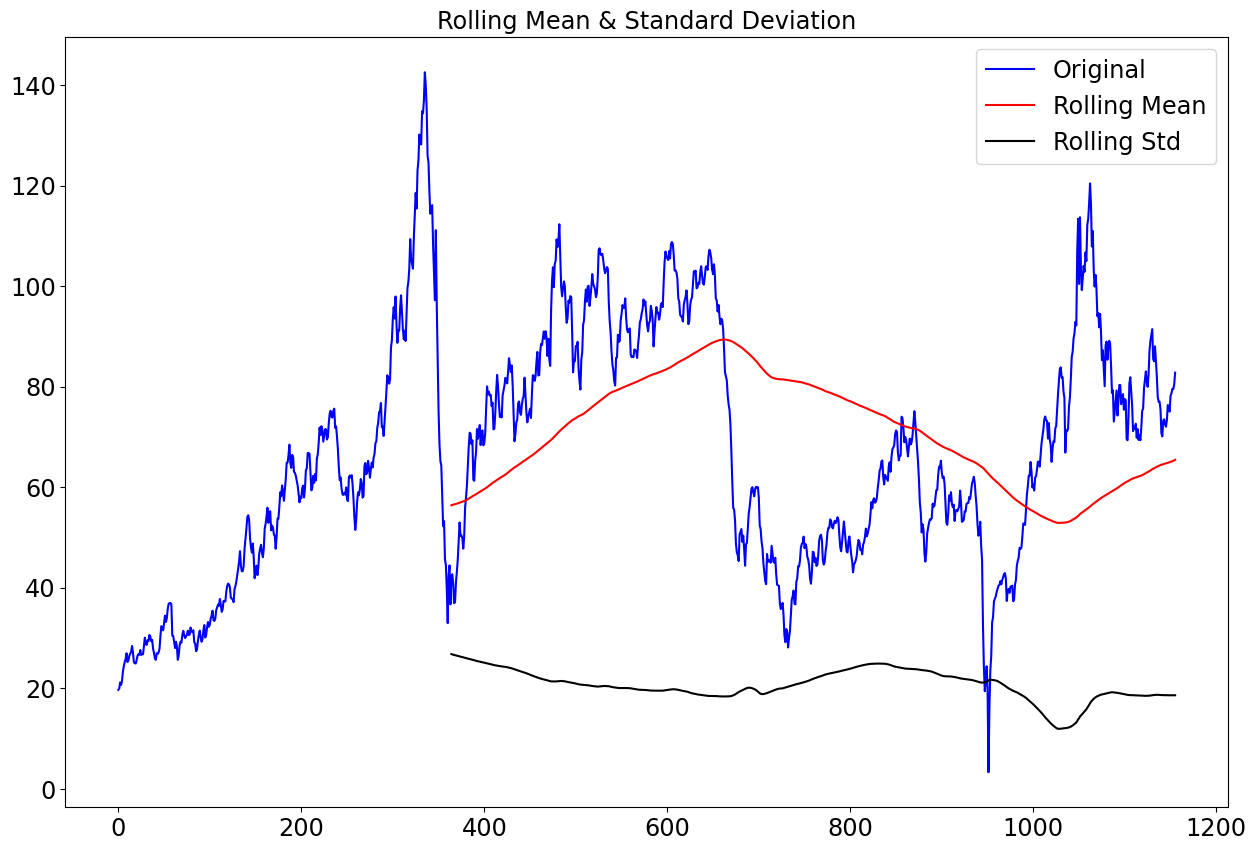

Results of Dickey-Fuller Test:
Test Statistic                   -3.127372
p-value                           0.024593
#Lags Used                       17.000000
Number of Observations Used    1138.000000
Critical Value (1%)              -3.436109
Critical Value (5%)              -2.864083
Critical Value (10%)             -2.568124
dtype: float64


<Figure size 1500x1000 with 0 Axes>

In [790]:
test_stationarity(df['WCOILWTICO'])
plt.savefig('Stationary data and Non-Stationary data.png')

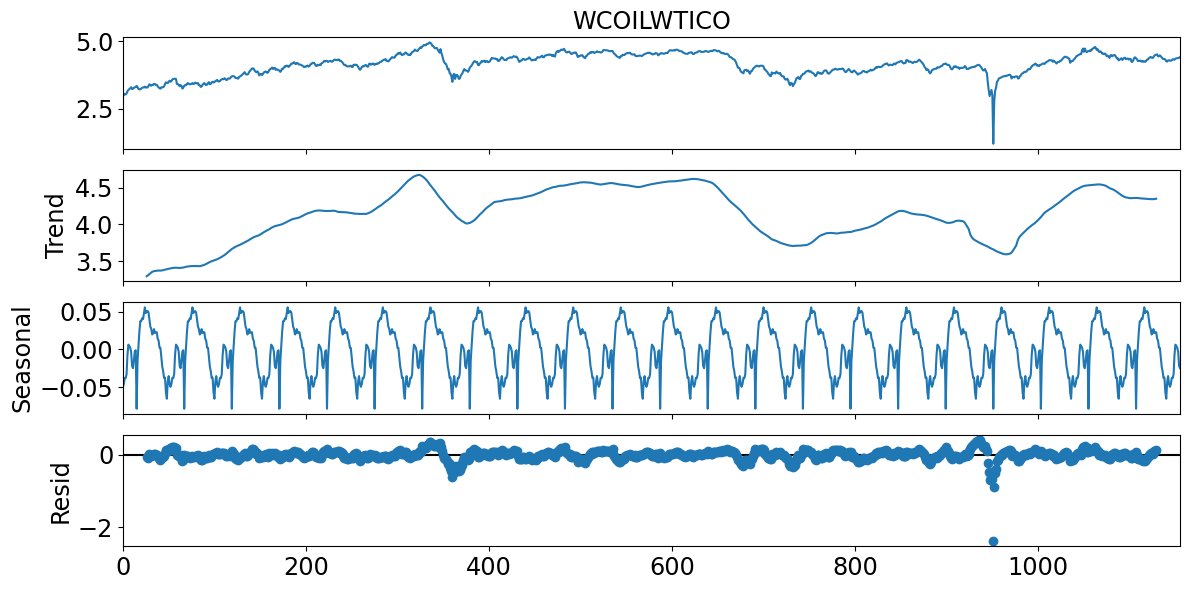

In [791]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_log = np.log(df['WCOILWTICO'])


plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(ts_log , period = 52 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


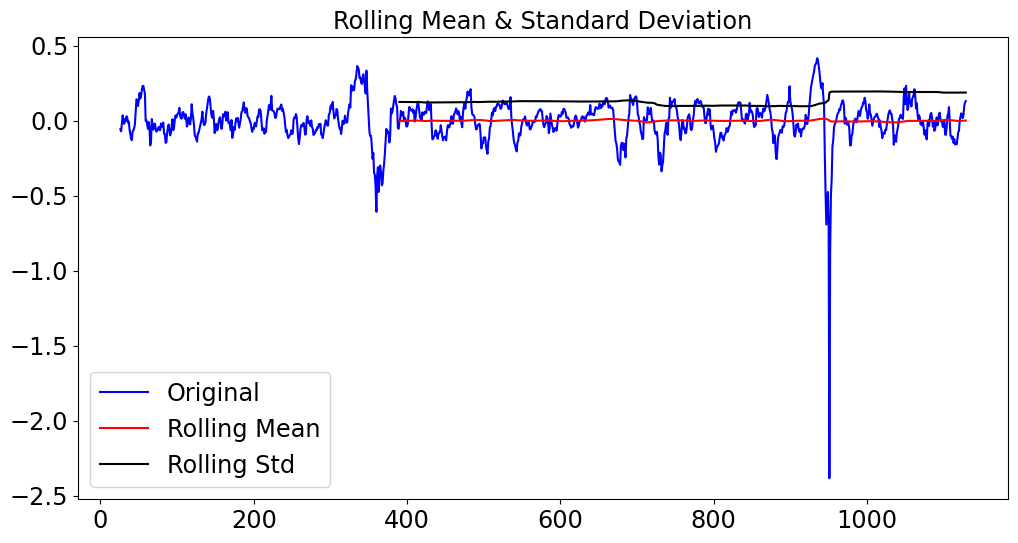

Results of Dickey-Fuller Test:
Test Statistic                -9.573245e+00
p-value                        2.258665e-16
#Lags Used                     8.000000e+00
Number of Observations Used    1.095000e+03
Critical Value (1%)           -3.436336e+00
Critical Value (5%)           -2.864183e+00
Critical Value (10%)          -2.568177e+00
dtype: float64


In [792]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

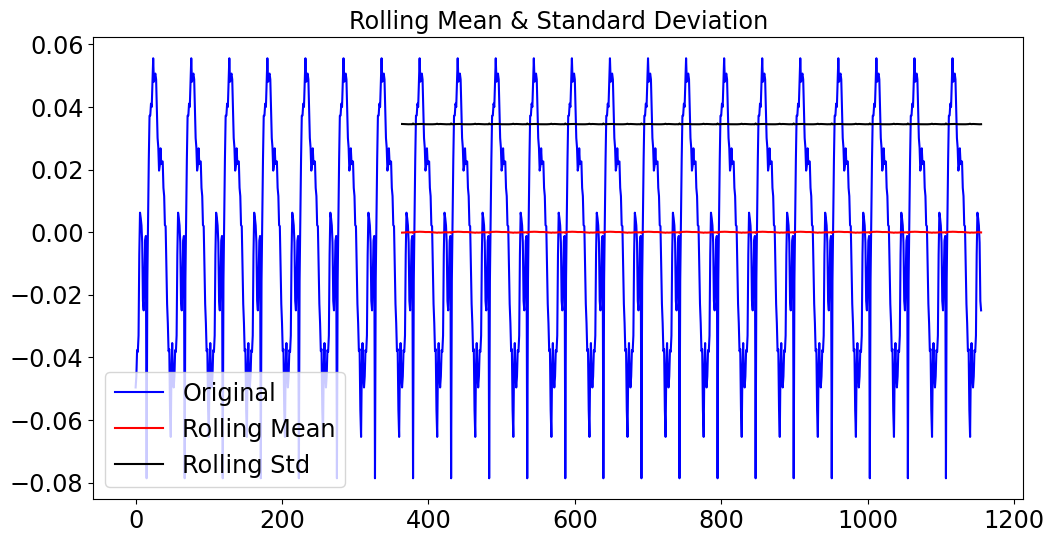

Results of Dickey-Fuller Test:
Test Statistic                -1.733721e+01
p-value                        5.366443e-30
#Lags Used                     2.300000e+01
Number of Observations Used    1.132000e+03
Critical Value (1%)           -3.436140e+00
Critical Value (5%)           -2.864097e+00
Critical Value (10%)          -2.568131e+00
dtype: float64


In [793]:
ts_decompose = seasonal
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

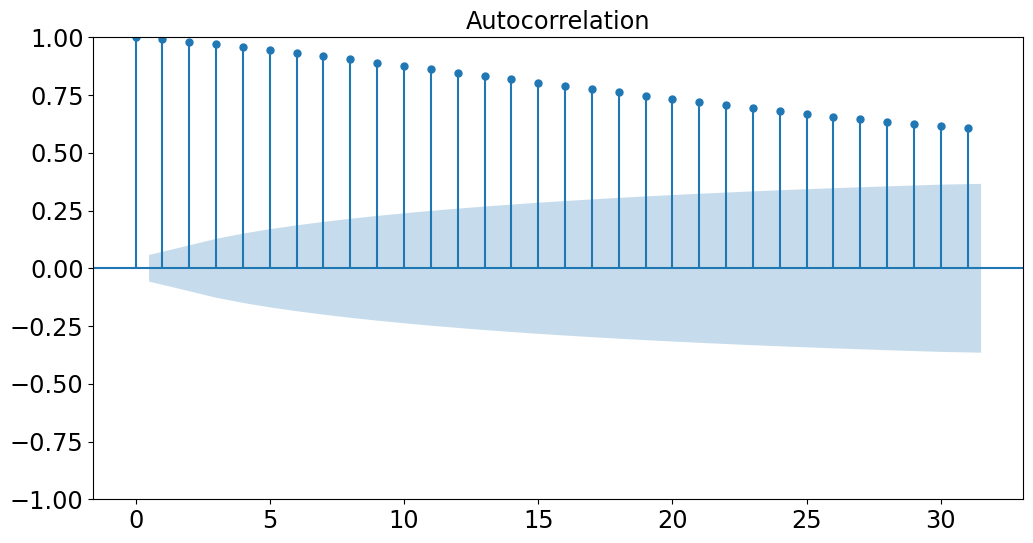

In [794]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['WCOILWTICO'])
plt.show()

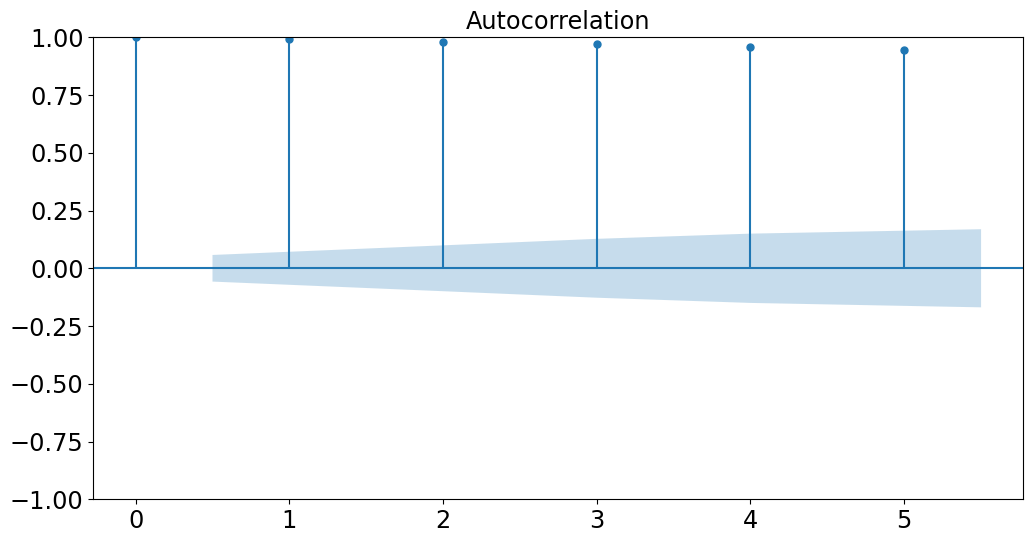

In [795]:
plot_acf(df['WCOILWTICO'], lags=5)
plt.show()

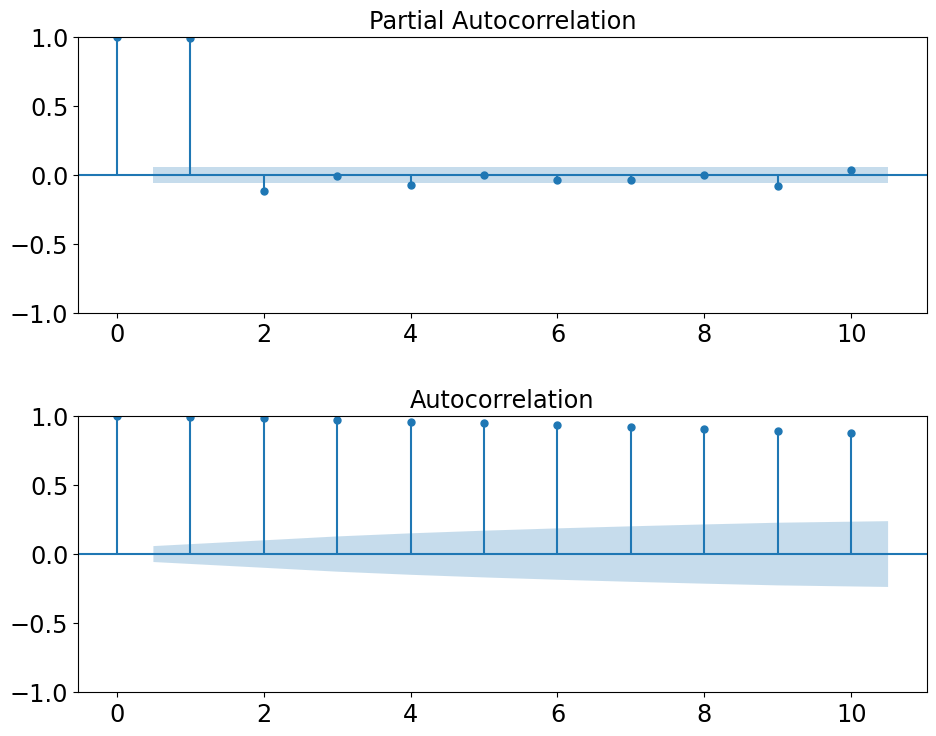

In [796]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10, 8))


ax1 = plot_pacf(df['WCOILWTICO'], lags=10, ax=ax1)



ax2 = plot_acf(df['WCOILWTICO'], lags=10, ax=ax2)



plt.tight_layout(pad=3.0)

# Save the figure
plt.savefig('Partial_Autocorrelation_and_Autocorrelation.png')

# Display the plot
plt.show()


In [797]:
import statsmodels.api as sm

In [798]:
sm.tsa.acf(df['WCOILWTICO'], nlags=10, qstat=True, alpha=0.05)

(array([1.        , 0.99134557, 0.98076232, 0.96987489, 0.95779388,
        0.94552633, 0.93266653, 0.91913501, 0.90553391, 0.89058374,
        0.87594669]),
 array([[1.        , 1.        ],
        [0.93369957, 1.04899157],
        [0.88149176, 1.08003289],
        [0.84240915, 1.09734064],
        [0.80779641, 1.10779134],
        [0.77642226, 1.1146304 ],
        [0.74682263, 1.11851042],
        [0.71833861, 1.11993141],
        [0.69121196, 1.11985587],
        [0.66390409, 1.1172634 ],
        [0.63792365, 1.11396973]]),
 array([ 1139.0283995 ,  2254.83296232,  3346.94833781,  4412.95035658,
         5452.72285936,  6465.28417802,  7449.53317541,  8405.70060187,
         9331.36274261, 10227.62917167]),
 array([1.08747183e-249, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]))

In [799]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


acf_result, conf_int, qstat, pvalues = sm.tsa.acf(df['WCOILWTICO'], nlags=10, qstat=True, alpha=0.05)


pacf_result = sm.tsa.pacf(df['WCOILWTICO'], nlags=len(acf_result)-1, method='ols')

table_data = pd.DataFrame({
    'Lag': np.arange(1, len(acf_result)),  # Adjust the range based on the number of lags you want to analyze
    'ACF': acf_result[:-1],
    'Confidence Interval Lower': conf_int[:-1, 0],  # Lower bound of confidence interval
    'Confidence Interval Upper': conf_int[:-1, 1],  # Upper bound of confidence interval
    'PACF': pacf_result[1:],  # Start from lag 1 for PACF
    'Q-Stat': qstat,
    'p-value': pvalues
})


print(pd.DataFrame(table_data))


   Lag       ACF  Confidence Interval Lower  Confidence Interval Upper  \
0    1  1.000000                   1.000000                   1.000000   
1    2  0.991346                   0.933700                   1.048992   
2    3  0.980762                   0.881492                   1.080033   
3    4  0.969875                   0.842409                   1.097341   
4    5  0.957794                   0.807796                   1.107791   
5    6  0.945526                   0.776422                   1.114630   
6    7  0.932667                   0.746823                   1.118510   
7    8  0.919135                   0.718339                   1.119931   
8    9  0.905534                   0.691212                   1.119856   
9   10  0.890584                   0.663904                   1.117263   

       PACF        Q-Stat        p-value  
0  0.991728   1139.028400  1.087472e-249  
1 -0.149390   2254.832962   0.000000e+00  
2 -0.012898   3346.948338   0.000000e+00  
3 -0.085373  

In [840]:
model_params_list = [
    {'order': (1, 0, 1)},
    {'order': (1, 0, 2)},
    {'order': (1, 0, 3)},
    {'order': (2, 0, 1)},
    {'order': (2, 0, 2)},
    {'order': (2, 0, 3)},
    {'order': (1, 1, 5)},
    {'order': (2, 2, 2)},
    {'order': (1, 1, 1)},
    {'order': (3, 3, 3)},
    {'order': (1, 1, 2)},
    {'order': (2, 1, 1)},
    {'order': (3, 1, 1)},
    
]

In [869]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score


metrics_df = pd.DataFrame(columns=['Model','RMSE', 'MAE', 'MAPE', 'R-squared','AIC','BIC', 'AR_P_lag1', 'MA_P_lag1'])


for model_params in model_params_list:
   
    model = ARIMA(timeseries, **model_params)
    results_ARIMA = model.fit()
    arima_pred_recent = results_ARIMA.predict(df['WCOILWTICO'].index[1100], df['WCOILWTICO'].index[-1], typ="levels")
    summary_table = results_ARIMA.summary()
    coefficients_table = summary_table.tables[1]  
    coefficients = coefficients_table.data
    
    
    rmse = np.sqrt(sum((arima_pred_recent-df['WCOILWTICO'][1100:])**2)/len(df['WCOILWTICO'][1100:]))
    mae = mean_absolute_error(df['WCOILWTICO'][1100:], arima_pred_recent)
    mape = mean_absolute_percentage_error(df['WCOILWTICO'][1100:], arima_pred_recent)
    r_squared = r2_score(df['WCOILWTICO'][1100:], arima_pred_recent)
    
   
    AIC = results_ARIMA.aic
    BIC = results_ARIMA.bic  
    ar_p_lag1 = float(coefficients[2][4])  
    ma_p_lag1 = float(coefficients[3][4])
    

    metrics_df = metrics_df.append({'Model': str(model_params),'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R-squared': r_squared, 
                                    'AIC': AIC, 'BIC': BIC, 'AR_P_lag1': ar_p_lag1, 'MA_P_lag1': ma_p_lag1}, ignore_index=True)


print(metrics_df)


                   Model      RMSE       MAE      MAPE  R-squared  \
0   {'order': (1, 0, 1)}  2.446959  1.756589  0.022779   0.812446   
1   {'order': (1, 0, 2)}  2.448413  1.754297  0.022753   0.812224   
2   {'order': (1, 0, 3)}  2.485780  1.779211  0.023111   0.806448   
3   {'order': (2, 0, 1)}  2.517656  1.770794  0.022961   0.801452   
4   {'order': (2, 0, 2)}  2.481530  1.760494  0.022852   0.807110   
5   {'order': (2, 0, 3)}  2.471157  1.764249  0.022911   0.808719   
6   {'order': (1, 1, 5)}  2.473547  1.772604  0.023044   0.808349   
7   {'order': (2, 2, 2)}  2.472143  1.796643  0.023336   0.808566   
8   {'order': (1, 1, 1)}  2.517356  1.779802  0.023088   0.801500   
9   {'order': (3, 3, 3)}  2.470142  1.763812  0.022894   0.808876   
10  {'order': (1, 1, 2)}  2.483485  1.770658  0.022992   0.806805   
11  {'order': (2, 1, 1)}  2.489728  1.771626  0.023000   0.805833   
12  {'order': (3, 1, 1)}  2.495378  1.788077  0.023239   0.804951   

            AIC          BIC  AR_

In [871]:
metrics_df =  pd.DataFrame(metrics_df)
metrics_df

,Model,RMSE,MAE,MAPE,R-squared,AIC,BIC,AR_P_lag1,MA_P_lag1
0,"{'order': (1, 0, 1)}",2.446959,1.756589,0.022779,0.812446,5724.403863,5744.649201,0.000,0.000
1,"{'order': (1, 0, 2)}",2.448413,1.754297,0.022753,0.812224,5726.360498,5751.667170,0.000,0.000
2,"{'order': (1, 0, 3)}",2.485780,1.779211,0.023111,0.806448,5720.526667,5750.894673,0.000,0.000
3,"{'order': (2, 0, 1)}",2.517656,1.770794,0.022961,0.801452,5721.041103,5746.347774,0.000,0.000
4,"{'order': (2, 0, 2)}",2.481530,1.760494,0.022852,0.807110,5718.190958,5748.558964,0.000,0.000
5,"{'order': (2, 0, 3)}",2.471157,1.764249,0.022911,0.808719,5716.850774,5752.280114,0.000,0.000
6,"{'order': (1, 1, 5)}",2.473547,1.772604,0.023044,0.808349,5713.047776,5748.471110,0.000,0.003
7,"{'order': (2, 2, 2)}",2.472143,1.796643,0.023336,0.808566,5722.040200,5747.338288,0.000,0.818
8,"{'order': (1, 1, 1)}",2.517356,1.779802,0.023088,0.801500,5714.906361,5730.087790,0.000,0.000
9,"{'order': (3, 3, 3)}",2.470142,1.763812,0.022894,0.808876,5741.646713,5777.058020,0.000,0.572


In [872]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
timeseries = df['WCOILWTICO']

model = ARIMA(timeseries, order=(1, 0, 1))  
results_ARIMA = model.fit() 
print(results_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:             WCOILWTICO   No. Observations:                 1166
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2858.202
Date:                Fri, 10 May 2024   AIC                           5724.404
Time:                        12:40:49   BIC                           5744.649
Sample:                             0   HQIC                          5732.041
                               - 1166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.9263      9.331      6.851      0.000      45.639      82.214
ar.L1          0.9920      0.003    340.732      0.000       0.986       0.998
ma.L1          0.1493      0.016      9.276      0.0

In [873]:
const_coef = float(coefficients[1][4])  # Coefficient of 'const'
ar_L1_coef = float(coefficients[2][4])  # Coefficient of 'ar.L1'
ma_L1_p_value = float(coefficients[3][4])  # P-value of 'ma.L1'

# Printing the values
print("Coefficient of 'const':", const_coef)
print("Coefficient of 'ar.L1':", ar_L1_coef)
print("P-value of 'ma.L1':", ma_L1_p_value)

Coefficient of 'const': 0.733
Coefficient of 'ar.L1': 0.441
P-value of 'ma.L1': 0.0


Text(0.5, 1.0, 'RMSE: 2.4470')

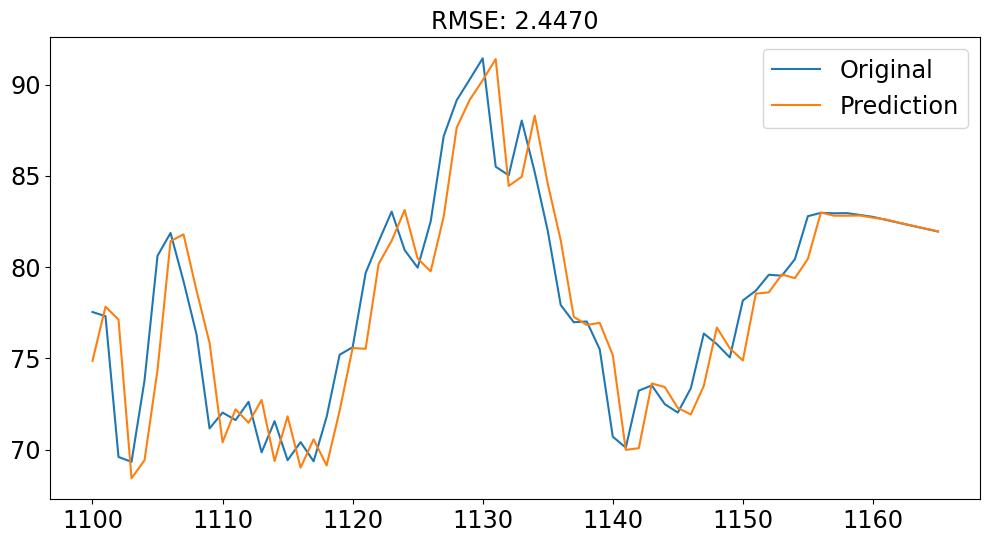

In [874]:
arima_pred_recent = results_ARIMA.predict(df['WCOILWTICO'].index[1100], df['WCOILWTICO'].index[-1], typ="levels")
plt.plot(df['WCOILWTICO'][1100:], label='Original')
plt.plot(arima_pred_recent, label='Prediction')
plt.legend(loc=1)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred_recent-df['WCOILWTICO'][1100:])**2)/len(df['WCOILWTICO'][1100:])))

In [875]:
rmse = np.sqrt(sum((arima_pred_recent-df['WCOILWTICO'][1100:])**2)/len(df['WCOILWTICO'][1100:]))

mae = mean_absolute_error(df['WCOILWTICO'][1100:], arima_pred_recent)


mape = mean_absolute_percentage_error(df['WCOILWTICO'][1100:], arima_pred_recent)


r_squared = r2_score(df['WCOILWTICO'][1100:], arima_pred_recent)


print(f"Roor Mean Squared error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R-squared (Coefficient of Determination): {r_squared:.4f}")

Roor Mean Squared error (RMSE): 2.4470
Mean Absolute Error (MAE): 1.7566
Mean Absolute Percentage Error (MAPE): 0.0228
R-squared (Coefficient of Determination): 0.8124


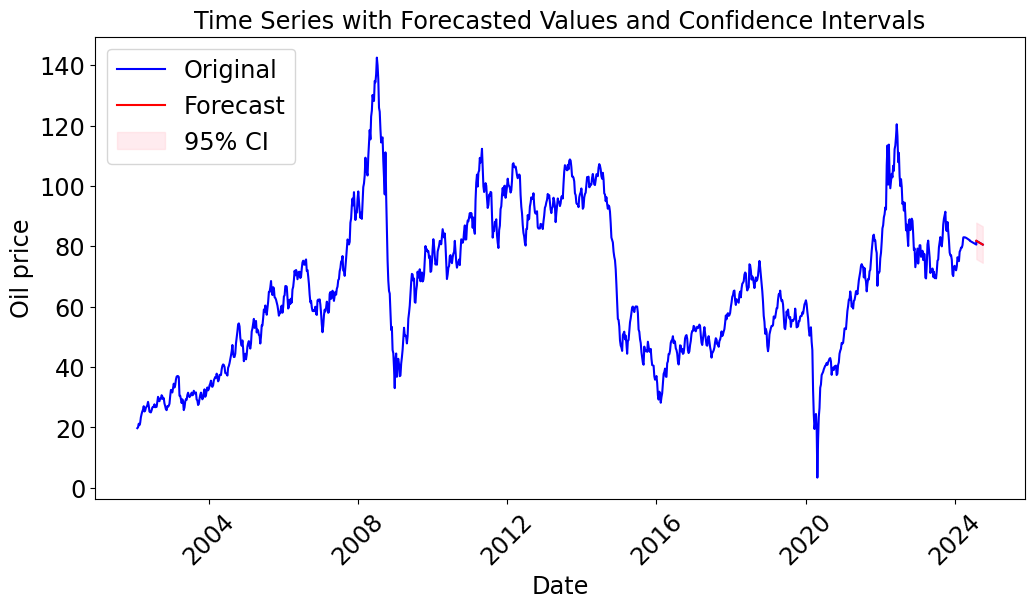

In [881]:
num_periods = 10 
forecast_start_date = df['DATE'].iloc[-1] + pd.DateOffset(weeks=0) 
forecast_dates = pd.date_range(start=forecast_start_date, periods=num_periods, freq='W')

forecast = results_ARIMA.forecast(steps=num_periods) 

residuals = results_ARIMA.resid
stderr = np.std(residuals)
conf_int = [forecast - 1.96 * stderr, forecast + 1.96 * stderr]  # 95% confidence interval


forecast_df = pd.DataFrame({'DATE': forecast_dates, 'WCOILWTICO': forecast, 'Lower_CI': conf_int[0], 'Upper_CI': conf_int[1]})
df = pd.concat([df, forecast_df], ignore_index=True)


plt.plot(df['DATE'], df['WCOILWTICO'], label='Original', color='blue')  # Original data in blue
plt.plot(forecast_dates, forecast, label='Forecast', color='red')  # Forecasted values in red
plt.fill_between(forecast_dates, conf_int[0], conf_int[1], color='pink', alpha=0.3, label='95% CI')  # Shaded confidence intervals
plt.legend()
plt.title('Time Series with Forecasted Values and Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Oil price')
plt.xticks(rotation=45)  
plt.show()


In [880]:
forecast_df

,DATE,WCOILWTICO,Lower_CI,Upper_CI
1166,2024-03-25,81.803199,75.759325,87.847072
1167,2024-04-01,81.659850,75.615977,87.703723
1168,2024-04-08,81.517651,75.473778,87.561524
1169,2024-04-15,81.376592,75.332719,87.420465
1170,2024-04-22,81.236664,75.192791,87.280538
1171,2024-04-29,81.097859,75.053986,87.141732
1172,2024-05-06,80.960166,74.916293,87.004039
1173,2024-05-13,80.823577,74.779704,86.867451
1174,2024-05-20,80.688084,74.644211,86.731957
1175,2024-05-27,80.553677,74.509804,86.597551
